In [ ]:
#Projet Mogpl M1 Informatique
#Dice Battle

#Yuhan WANG & Yufei LIU

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

#variable global N est le point cible et D est le nombre de dés qu'on peut lancer maximument chaque fois
#LP = ligne perdu signifie que si joueur1 a moins de cette ligne et joueur 2 a N-1 point alors joueur1 a perdu
N = 100
D = 10
LP = N - 6*D

#Q1
def initialise_tab(d):
    """
    entrée : le nombre de dés
    sortie : Q_tab et P_tab initialisé
    """
    Q_tab=np.ones((D+1,101))*-1
    
    for a in range(0,101):
        Q_tab[0,a]=0
    for b in range(0,D+1):
        Q_tab[b,0]=0
    for i in range (2,7):
        #la propabilité d'obtenir 1 avec d dés
        Q_tab[1,i]=1/5
    
    P_tab=np.ones((D+1,101))*-2
    for c in range(0,D+1):
        P_tab[c,0]=0
        P_tab[c,1]=1-np.power(5/6,c)
    for d in range(0,101):
        P_tab[0,d]=0
        
        
    return Q_tab,P_tab  

Q_tab=initialise_tab(D)[0]
P_tab= initialise_tab(D)[1]

def Q(d,k):
    if d<=0:
        return 0
    if k<=0 | ((k>1) & (k<2*d)) | k>6*d :
        return 0
    else:
        if(Q_tab[d,k]!=-1):
            #print(d,k,Q_tab[d,k])
            return Q_tab[d,k]
        else:
            res = 0
            for j in range(2,7):
                #print(d-1,k-j)
                if(Q_tab[d-1,k-j]==-1):
                    Q_tab[d-1,k-j]=Q(d-1,k-j)
                res += Q(d-1,k-j)
            return res/5
        
        
def P(d,k):
    if(k==1):
        return P_tab[d,1]
    if P_tab[d,k]!=-2:
        return P_tab[d,k]
    else:
        P_tab[d,k]=(5/6)**d*Q(d,k)
        return P_tab[d,k]

In [153]:
#Q2

def calcul_EP(d):
    return 4*d*(5/6)**d + 1 - (5/6)**d

print(calcul_EP(5))
print(calcul_EP(6))
#On doit choisir d*=6 car EP(6) est supérieur de EP(5)




8.63567386831276
8.702653463648836


In [154]:
#白给的
np.set_printoptions(threshold=np.inf)

def EG(i,j):
    lim = N-1+6*D
    if (i>=N) | ((i==N-1) & (j<N)):
        return 1
    elif (i<LP & j==N-1) | j>=N:
        return -1
    else:
        tab = np.zeros(((lim-i+1),(lim-j+1)))
                
        for a in range(lim-i+1):
            for b in range(lim-j+1):
                if(a<6*D):
                    tab[a][b]=1
                elif(a==6*D):
                    if(b>=6*D):
                        tab[a][b]=1
                    else:
                        tab[a][b]=-1
                elif((6*D<a)&(b<6*D)):
                    tab[a][b]=-1
        #print("heelo",tab)
        for c in range(6*D+1,lim-i+1):
            for d in range(6*D,lim-j+1):
                if tab[c][d]==0:
                    cas_j1 = []
                    for d1 in range(1,D+1):
                        res1 = 0
                        for e1 in range(1,6*d1+1):
                            cas_j2 = []
                            for d2 in range(1,D+1):
                                res2 = 0
                                for e2 in range(1,6*d2+1):
                                    res2 += tab[c-e1][d-d2] * tab_P[d2-1][e2-1]
                                cas_j2.append(res2)
                            opt_j2 = np.argmin(np.array(cas_j2))
                            res1 += cas_j2[opt_j2] * tab_P[d1-1][e1-1]
                        cas_j1.append(res1)
                tab[c][d]=max(cas_j1)  
        #print("bye",tab.shape,tab)
        return tab[lim-i][lim-j]
        
              
def EG2(i,j):
    lim = N-1+6*D
    if (i>=N) | ((i==N-1) & (j<N)):
        return 1
    elif (i<LP & j==N-1) | j>=N:
        return -1
    else:
        tab = np.zeros(((lim-i+1),(lim-j+1)))
                
        for a in range(lim-i+1):
            for b in range(lim-j+1):
                if(a<6*D):
                    tab[a][b]=1
                elif(a==6*D):
                    if(b>=6*D):
                        tab[a][b]=1
                    else:
                        tab[a][b]=-1
                elif((6*D<a)&(b<6*D)):
                    tab[a][b]=-1
        #print("heelo",tab)
        for c in range(6*D+1,lim-i+1):
            for d in range(6*D,lim-j+1):
                if tab[c][d]==0:
                    ress=[]
                    for d1 in range(1,D+1):
                        cum=0
                        for e1 in range(1,6*d1+1):
                            print("i",i)
                            cum += tab_P[d-1][e1-1] * tab[d][c-e1]
                        ress.append(-cum)
                
                tab[c][d]=max(ress)  
        #print("bye",tab.shape,tab)
        return tab[lim-i][lim-j]

    



In [270]:
class strategie_optimal(object):
    def __init__(self, D, N):
        self.N = N
        self.D = D
        self.tab = np.ones((N,N))*100
        self.best_choice = np.zeros((N,N))
         
    def EG(self,i,j):
        if(i>=self.N):
            return 1
        elif(j>=self.N):
            return -1
        elif self.tab[i][j]<100:
            return self.tab[i][j]
        
        ress=[]
        for d1 in range(1,self.D+1):
            cum=0
            for e1 in range(1,6*d1+1):
                cum += P(d1,e1) * self.EG(j,i+e1)
            ress.append(-cum)
        self.tab[i][j]=max(ress)
        self.best_choice[i][j]=int(np.argmax(ress)+1)
        return self.tab[i][j]
    
    def choice_optimal(self,i,j):
        if self.best_choice[i][j]<1:
            t = self.EG(i,j)
        return self.best_choice[i][j]
    

In [252]:
#Q7
class strategie_aveugle(object):
    def __init__(self, D, N):
        self.N = N
        self.D = D
        
    def choice_optimal(self,i,j):
        if self.D > 5:
            return 6
        return self.D
    
stra_opt1 = strategie_optimal(10,100)
stra_opt1 = strategie_optimal(10,100)
#def strategie_optimale(i,j):


1.0000000000000002


In [305]:
#Q8
def game_ai(n,stra1,stra2):
    state=[0,0]
    while(state[1]<n)&(state[0]<n):
        d1 = int(stra1.choice_optimal(state[0],state[1]))
        p1 = get_random_score(d1)
        state[0] += p1
        if(state[0]>=n):
            break
        d2 = int(stra2.choice_optimal(state[1],state[0]))
        p2 = get_random_score(d2)
        state[1] += p2
    if state[1]>1:
        return 1
    else:
        return -1

        

def test_D(D,N):
    n_test = 100
    n_intervalle = 10
    ds = [ int(D*i/n_intervalle) for i in range(1,1+n_intervalle)]
    res = np.zeros((4,n_intervalle))
    #res = [aa,ao,oa,oo]
    for di in range(len(ds)):
        res_aa = 0
        res_ao = 0
        res_oa = 0
        res_oo = 0
        for i in range(n_test):
            stra_opt = strategie_optimal(ds[di],N)
            stra_avg = strategie_aveugle(ds[di],N)
            res_aa += game_ai(N,stra_avg,stra_avg)
            res_ao += game_ai(N,stra_avg,stra_opt)
            res_oa += game_ai(N,stra_opt,stra_avg)
            res_oo += game_ai(N,stra_opt,stra_opt)
            
        res[0][di] = res_aa / n_test
        res[1][di] = res_ao / n_test
        res[2][di] = res_oa / n_test
        res[3][di] = res_oo / n_test
        
    plt.plot(ds , res[0], c='r')
    plt.xlabel("nombre de dé possible")
    plt.ylabel("variance de gain J1")
    plt.title("J1 aveugle & J2 aveugle")
    plt.show()
    
    plt.plot(ds , res[1], c='blue')
    plt.xlabel("nombre de dé possible")
    plt.ylabel("variance de gain J1")
    plt.title("J1 aveugle & J2 optimal")
    plt.show()
    
    plt.plot(ds , res[2], c='y')
    plt.xlabel("nombre de dé possible")
    plt.ylabel("variance de gain J1")
    plt.title("J1 optimal & J2 aveugle")
    plt.show()
    
    plt.plot(ds , res[3], c='black')
    plt.xlabel("nombre de dé possible")
    plt.ylabel("variance de gain J1")
    plt.title("J1 optimal & J2 optimal")
    plt.show()
    return res
    

    
def test_N(D,N):
    n_test = 100
    n_intervalle = 10
    ns = [ int(N*i/n_intervalle) for i in range(1,1+n_intervalle)]
    res = np.zeros((4,n_intervalle))
    #res = [aa,ao,oa,oo]
    for ni in range(len(ns)):
        res_aa = 0
        res_ao = 0
        res_oa = 0
        res_oo = 0
        for i in range(n_test):
            stra_opt = strategie_optimal(D,ns[ni])
            stra_avg = strategie_aveugle(D,ns[ni])
            res_aa += game_ai(ns[ni],stra_avg,stra_avg)
            res_ao += game_ai(ns[ni],stra_avg,stra_opt)
            res_oa += game_ai(ns[ni],stra_opt,stra_avg)
            res_oo += game_ai(ns[ni],stra_opt,stra_opt)
            
        res[0][ni] = res_aa / n_test
        res[1][ni] = res_ao / n_test
        res[2][ni] = res_oa / n_test
        res[3][ni] = res_oo / n_test
        
    plt.plot(ns , res[0], c='r')
    plt.xlabel("ligne N pour gagner")
    plt.ylabel("variance de gain J1")
    plt.title("J1 aveugle & J2 aveugle")
    plt.show()
    
    plt.plot(ns , res[1], c='blue')
    plt.xlabel("ligne N pour gagner")
    plt.ylabel("variance de gain J1")
    plt.title("J1 aveugle & J2 optimal")
    plt.show()
    
    plt.plot(ns , res[2], c='y')
    plt.xlabel("ligne N pour gagner")
    plt.ylabel("variance de gain J1")
    plt.title("J1 optimal & J2 aveugle")
    plt.show()
    
    plt.plot(ns , res[3], c='black')
    plt.xlabel("ligne N pour gagner")
    plt.ylabel("variance de gain J1")
    plt.title("J1 optimal & J2 optimal")
    plt.show()
    return res

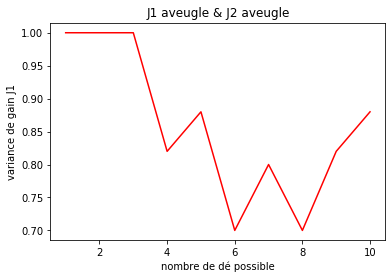

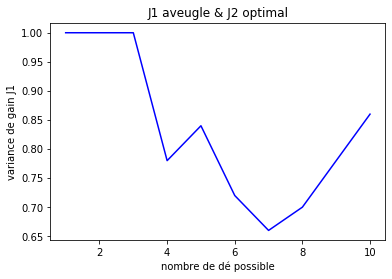

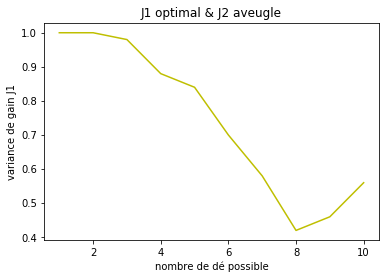

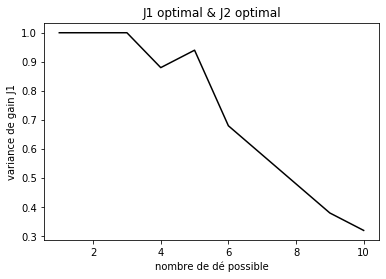

array([[1.  , 1.  , 1.  , 0.82, 0.88, 0.7 , 0.8 , 0.7 , 0.82, 0.88],
       [1.  , 1.  , 1.  , 0.78, 0.84, 0.72, 0.66, 0.7 , 0.78, 0.86],
       [1.  , 1.  , 0.98, 0.88, 0.84, 0.7 , 0.58, 0.42, 0.46, 0.56],
       [1.  , 1.  , 1.  , 0.88, 0.94, 0.68, 0.58, 0.48, 0.38, 0.32]])

In [308]:
test_D(10,30)

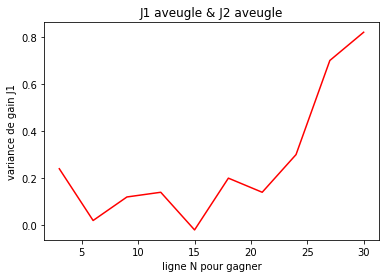

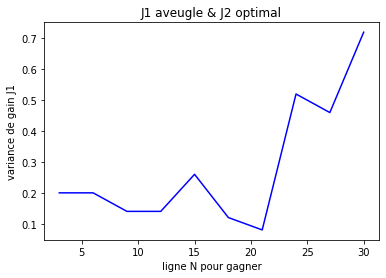

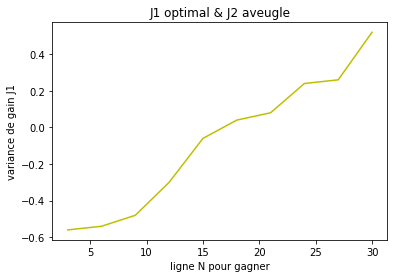

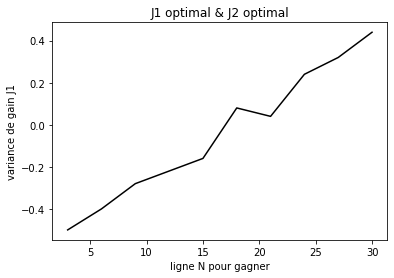

array([[ 0.24,  0.02,  0.12,  0.14, -0.02,  0.2 ,  0.14,  0.3 ,  0.7 ,
         0.82],
       [ 0.2 ,  0.2 ,  0.14,  0.14,  0.26,  0.12,  0.08,  0.52,  0.46,
         0.72],
       [-0.56, -0.54, -0.48, -0.3 , -0.06,  0.04,  0.08,  0.24,  0.26,
         0.52],
       [-0.5 , -0.4 , -0.28, -0.22, -0.16,  0.08,  0.04,  0.24,  0.32,
         0.44]])

In [310]:
test_N(10,30)

In [168]:
#print(stra_opt1.EG(95,95))
[stra_opt1.EG(i,99) for i in range(0,100)]
print(stra_opt1.EG(0,0))

0.06871904732303523


In [230]:
#Q9
def get_random_score(d):
    res = 0
    for i in range(d):
        tmp = random.randint(1 , 6)
        if(tmp==1):
            return 1
        res += tmp
    return res

class game(object):
    def __init__(self, D, N):
        self.N = N
        self.D = D
        self.tab = np.ones((N,N))*100
        
    
    def start_conter_ai(self,strategie):
        state=[0,0]
        tour = 0
        while(state[1]<self.N)&(state[0]<self.N):
            tour += 1
            print("*****************************************\n")
            print("Tour:",tour, "\n Score of player1: ",state[0],"\n Score of player2: ",state[1],"\n Score of target: ",self.N )
            print("You can make a choice between 1 and ",self.D," for this round:")
            d1 = int(input())
            p1 = get_random_score(d1)
            print("You get ",p1, "score with ",d1, " dice(s)!\n")
            state[0]+=p1
            if(state[0]>=n):
                break
            d2 = int(strategie.choice_optimal(state[1],state[0]))
            p2 = get_random_score(d2)
            print("AI get ",p2, "score with ",d2," dice(s)!\n")
            state[1]+=p2
            print("\n\n\n\n\n\n")
            
        if state[0]>=self.N:
            print("You win")
        else:
            print("•••You lose•••")
            
            



In [231]:
game1 = game(10,100)
game1.start_conter_ai(stra_opt1)

*****************************************

Tour: 1 
 Score of player1:  0 
 Score of player2:  0 
 Score of target:  100
You can make a choice between 1 and  10  for this round:
5
You get  15 score with  5  dice(s)!

AI get  1 score with  6  dice(s)!








*****************************************

Tour: 2 
 Score of player1:  15 
 Score of player2:  1 
 Score of target:  100
You can make a choice between 1 and  10  for this round:
5
You get  1 score with  5  dice(s)!

AI get  1 score with  6  dice(s)!








*****************************************

Tour: 3 
 Score of player1:  16 
 Score of player2:  2 
 Score of target:  100
You can make a choice between 1 and  10  for this round:
1
You get  6 score with  1  dice(s)!

AI get  15 score with  6  dice(s)!








*****************************************

Tour: 4 
 Score of player1:  22 
 Score of player2:  17 
 Score of target:  100
You can make a choice between 1 and  10  for this round:
1
You get  5 score with  1  dice(s)!

AI g

In [247]:
stra_opt1.choice_optimal(41,41)

6.0